# Importing Libraries

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Dataset

In [36]:
df = pd.read_csv(r"C:\Users\benke\Loan Prediction\credit_data (1).csv")
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


# Data Investigation

In [37]:
df.isnull().sum()

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64

In [38]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [39]:
df.shape

(2000, 6)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   LTI       2000 non-null   float64
 5   default   2000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


In [41]:
df.drop(columns = ['clientid'], axis =1, inplace=True)

In [42]:
df.head()

,income,age,loan,LTI,default
0,66155.925095,59.017015,8106.532131,0.122537,0
1,34415.153966,48.117153,6564.745018,0.190752,0
2,57317.170063,63.108049,8020.953296,0.139940,0
3,42709.534201,45.751972,6103.642260,0.142911,0
4,66952.688845,18.584336,8770.099235,0.130989,1


In [43]:
df.rename(columns={'income': 'Income', 'age': 'Age', 'loan': 'Loan', 'default': 'Default'}, inplace=True)

In [44]:
df.head()

,Income,Age,Loan,LTI,Default
0,66155.925095,59.017015,8106.532131,0.122537,0
1,34415.153966,48.117153,6564.745018,0.190752,0
2,57317.170063,63.108049,8020.953296,0.139940,0
3,42709.534201,45.751972,6103.642260,0.142911,0
4,66952.688845,18.584336,8770.099235,0.130989,1


# Feature Selection

In [45]:
# Independent Variable 

X = df.drop('Default', axis=1)

In [46]:
X.head()

,Income,Age,Loan,LTI
0,66155.925095,59.017015,8106.532131,0.122537
1,34415.153966,48.117153,6564.745018,0.190752
2,57317.170063,63.108049,8020.953296,0.139940
3,42709.534201,45.751972,6103.642260,0.142911
4,66952.688845,18.584336,8770.099235,0.130989


In [47]:
# Dependent Variable
y = df['Default']

In [48]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Default, dtype: int64

In [49]:
y_counts = y.value_counts()

y_counts #0 is false, they will not default, 1 is True, they will default

Default
0    1717
1     283
Name: count, dtype: int64

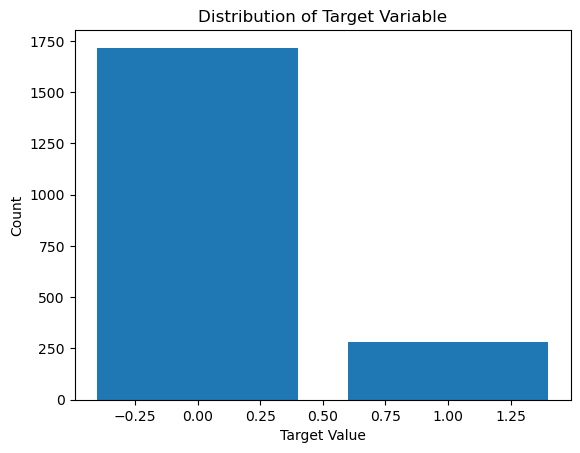

In [50]:
# Visualizing the target 

# Create the bar plot
plt.bar(y_counts.index, y_counts)

# Add labels and title
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Show the plot
plt.show()

In [51]:
# import smote to balance dataset
from imblearn.over_sampling import SMOTE

In [52]:
# balancing the imbalanced data

from collections import Counter
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your features and 'y' is your target variable

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after oversampling
print("Class Distribution Before Sampling:", Counter(y))
print("Class Distribution After Sampling:", Counter(y_resampled))

Class Distribution Before Sampling: Counter({0: 1717, 1: 283})
Class Distribution After Sampling: Counter({0: 1717, 1: 1717})


## Train-Test_Split

In [53]:
from sklearn.model_selection import train_test_split

#split the data into tranining and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


             Income        Age         Loan       LTI
3352  41681.974784  30.811608  7360.384546  0.176574
2800  35894.339734  29.444767  5427.012862  0.151228

             Income        Age         Loan       LTI
2469  27285.112940  18.943338  4493.611754  0.164689
3145  43717.930912  24.933023  7378.503391  0.168765

 3352    1
2800    1
Name: Default, dtype: int64

 2469    1
3145    1
Name: Default, dtype: int64


## Model Selection

- Logistic Regression
- Random Forest
- Support Vector Machine 

### Importing Models

In [54]:
# importing algorithms and libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

## Scaling the Dataset

In [55]:
# Scaling the test_train dataset using MinMaxScaler 

from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model on Logistics Regression Algorithm

In [56]:
# training the data using logistic regression

#initializing the model
lr_model = LogisticRegression()

# fitting the model on the training set
lr_model.fit(X_train_scaled, y_train)


lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [57]:
# checking the accuracy of the model 

from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test)*100} %')  # accuracy means how well the model is able to classify the two classes

The accuracy of the logistic regression is 95.05334626576139 %


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name, average='macro'):
    '''
    Calculates and return a dictionary of performance metrics for a classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

# Use the function with the 'macro' average for multiclass problems
lr_result = metrics_calculator(y_test, y_pred, 'lr_model', average='macro')
print(lr_result)


{'Model': 'lr_model', 'Accuracy': 0.950533462657614, 'Precision': 0.9511782420478072, 'Recall': 0.9523122150771367, 'F1-Score': 0.9505183802182683}


### Training the model using Support Vector Machine

In [59]:
# training the model using support vector machine

# initializing the model

svm_model = SVC(probability=True)

# Fit the model

svm_model.fit(X_train_scaled, y_train)

svm_predict = svm_model.predict(X_test_scaled)

In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predict)

# Print the accuracy
print(f'The accuracy of the Support Vector Machine is {accuracy*100:.2f} %')

The accuracy of the Support Vector Machine is 97.96 %


### Training the model on Random Forest

In [61]:
# Initialize the model
random_forest = RandomForestClassifier()

# Fit the model
random_forest.fit(X_train_scaled, y_train)

# Make predictions
random_forest_predict = random_forest.predict(X_test_scaled)

In [62]:
# Calculate accuracy
accuracy_random = accuracy_score(y_test, random_forest_predict)

# Print accuracy
print(f'The accuracy of the Random Forest is {accuracy_random*100:.2f} %')

The accuracy of the Random Forest is 100.00 %


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      0.986     0.919     0.951       543
           1      0.916     0.986     0.950       488

    accuracy                          0.951      1031
   macro avg      0.951     0.952     0.951      1031
weighted avg      0.953     0.951     0.951      1031



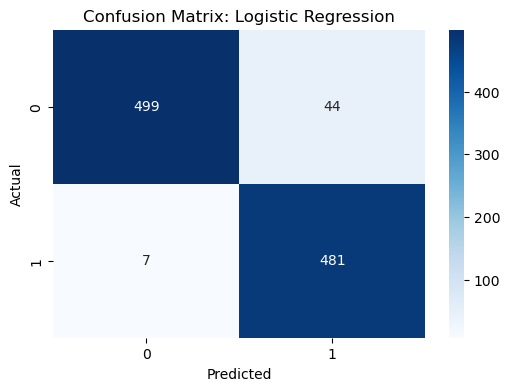

SVM Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.961     0.980       543
           1      0.959     1.000     0.979       488

    accuracy                          0.980      1031
   macro avg      0.979     0.981     0.980      1031
weighted avg      0.980     0.980     0.980      1031



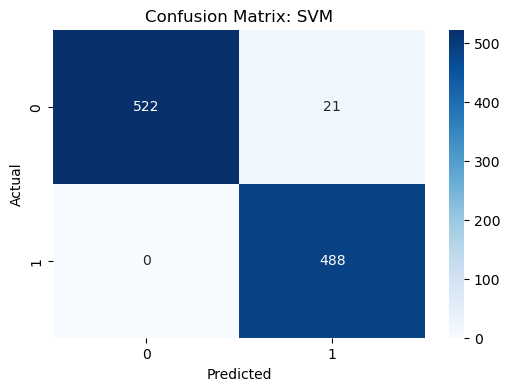

Random Forest Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       543
           1      1.000     1.000     1.000       488

    accuracy                          1.000      1031
   macro avg      1.000     1.000     1.000      1031
weighted avg      1.000     1.000     1.000      1031



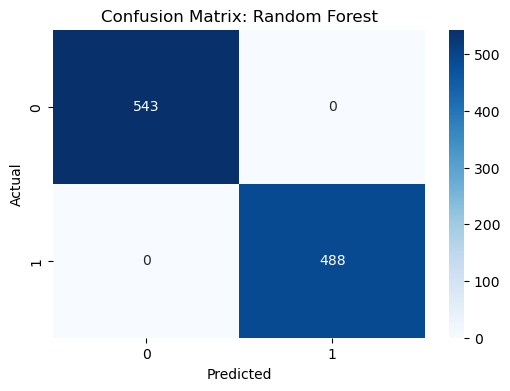

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Create a list of model names
model_names = ['Logistic Regression', 'SVM', 'Random Forest']
models = [lr_model, svm_model, random_forest]

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with 3 decimal places
    report = classification_report(y_test, y_pred, digits=decimal_places)
    print(f'{model_names[i]} Classification Report:\n{report}')
    
    # Create a new figure for each confusion matrix to avoid overlapping
    plt.figure(figsize=(6, 4))
    
    # Add a heatmap style to the confusion matrix plot
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## Checking AUC-ROC

In [64]:
# Use probabilities of the positive class (2nd column)
lr_auc = roc_auc_score(y_test, lr_probs[:, 1])
svm_auc = roc_auc_score(y_test, svm_probs[:, 1])
random_auc = roc_auc_score(y_test, random_probs[:, 1])

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Support Vector Machine AUC-ROC: {svm_auc:.2f}')
print(f'Random Forest AUC-ROC: {random_auc:.2f}')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Feature Engineering with Random Forest

In [ ]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

In [ ]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

## Splitting the Features into train and test

In [ ]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['Age', 'LTI', "Loan"]]
X_valid2 = X_valid[['Age', 'LTI', "Loan"]]


## Using the best performing model to train the new features

In [ ]:
# Since Random Forest model is the best performing model

# fit the model on the new training set
random_forest.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = random_forest.predict(X_valid2)

## Checking Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

## Checking Accuracy, Precision, Recall Score and F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_valid2_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid, y_valid2_pred, average='weighted')
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid, y_valid2_pred, average='weighted')
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid, y_valid2_pred, average='weighted')
print(f'F1-score: {f1:.2f}')


In [65]:
# Saving baseline model

import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(random_forest, pickle_out)
pickle_out.close()